## Atividade 02

Tema: Algoritmos básicos de programação em linguagem python e
análise de dados.



1. Escreva uma função que receba uma lista de números e retorne outra lista
com os números ímpares.

In [52]:
#Função que recebe uma lista de números e retorna uma lista de número impares
def numeros_impares(lista):
  #Nova lista vazia
  lista_numero_impar = []
  for numero in lista:
    if numero % 2 != 0: #Verifica se o número é impar calculando módulo da divisão por 2
      lista_numero_impar.append(numero)
  return lista_numero_impar #Nova lista contendo apenas números impares da lista inicial

numeros = [22, 11, 16, 6, 20, 25]
print(numeros_impares(numeros))

[11, 25]


2. Escreva uma função que receba uma lista de números e retorne outra lista
com os números primos presentes.

In [ ]:
def numeros_primos(lista):
  lista_numero_primo = []
  for numero in lista:
    if numero % numero == 0:
      lista_numero_primo.append(numero)
  return lista_numero_primo

numeros = [2, 3, 10, 20, 35, 100]
numeros_primos(numeros)

[2, 3, 10, 20, 35, 100]

3. Escreva uma função que receba duas listas e retorne outra lista com os
elementos que estão presentes em apenas uma das listas.


In [50]:
'''
Para resolver este problema vou utilizar a noção de diferença simétrica da teoria do conjuntos
Onde a diferença simétrica de dois conjuntos A e B é o conjunto dos elementos
que estão em um dos conjuntos e não na sua intersecção.

Pode de se usar também uma estrutura de controle for if para percorrer as listas.
'''
def lista_unica(lista1, lista2):
  #transforma as lista em conjuntos com valores unicos
  conjunto1 = set(lista1)
  conjunto2 = set(lista2)

  #Todos os elementos em um ou no outro, mas não em ambos a b. Sintax alternativa a ^ b
  conjunto_simetrico = conjunto1.symmetric_difference(conjunto2)

  #retorna o conjunto com elementos exclusivo em forma de lista
  return list(conjunto_simetrico)

lista1 = [21, 6, 20, 25]
lista2 = [21, 10, 20, 24]
print(lista_unica(lista1, lista2))

[6, 10, 24, 25]


4. Dada uma lista de números inteiros, escreva uma função para encontrar o
segundo maior valor na lista.


In [44]:
def maior_valor(numeros_inteiros):
  #Ordena a lista do menor para o maior sorted() remove duplicatas convertendo em conjunto set()
  numeros_ordenados = sorted(set(numeros_inteiros))

  #Verifica se existe ao menos dois valores na lista
  if len(numeros_ordenados) >= 2:
    segundo_maior_valor = numeros_ordenados[-2] #atribui penúltimo elemento da lista

    print(segundo_maior_valor)

#Lista de números inteiros
numeros_inteiros =[22, 11, 16, 6, 20, 25, 21, 15, 47, 6, 20, 25]

#Chama função maior_valor() e passa como argumento lista de numeros inteiros
maior_valor(numeros_inteiros)

25


5. Crie uma função que receba uma lista de tuplas, cada uma contendo o
nome e a idade de uma pessoa, e retorne a lista ordenada pelo nome das
pessoas em ordem alfabética.


In [53]:
#Função que retorna lista ordenada pelo nome
def lista_ordenada_nome(lista_nomes):

  #ordena uma lista através do primeiro elemento da tupla
  return sorted(lista_nomes, key=lambda nome: nome[0])

#Tuplas com os nomes e idades de cada pessoa
nomes = [("Lucas", 39), ("Fiama", 31), ("Maria", 16)]
nomes_ordenados = lista_ordenada_nome(nomes)
print(nomes_ordenados)

[('Fiama', 31), ('Lucas', 39), ('Maria', 16)]


6. Como identificar e tratar outliers em uma coluna numérica usando desvio
padrão ou quartis?

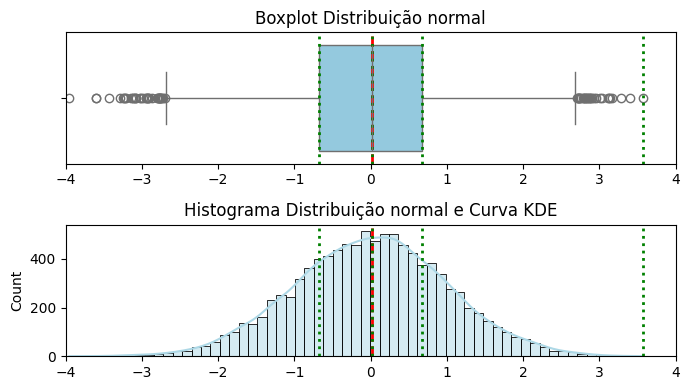

In [1]:
#Importando as bibliotecas padrão
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

'''
Outliers são pontos de observação que estão distantes de outras observações.
Para identificar e tratar outliers vamos usar um bloxpot para distribuição normal
e analisar valores atípicos
'''

#Gera um array com 10000 numeros aleatórios seguindo uma distribuição normal(localização, desvio padrão, amostra)
normal = np.random.normal(0, 1, 10000)

#Calcula os quartis da distribuição e selenciona coluna ([0]) no df
quartis = pd.DataFrame(normal).quantile([0.25, 0.5, 0.75, 1])[0]

#Cria uma figura com dois subgráficos verticais
fig, axs = plt.subplots(nrows=2, figsize=(7, 4))

#Boxplot da distribuição normal
sns.boxplot(x=normal, ax=axs[0], color='skyblue')
axs[0].set_xlim(-4, 4)
axs[0].set_title("Boxplot Distribuição normal")

#Linhas verticais da mediana e quartis
axs[0].axvline(np.median(normal), color='r', linestyle='dashed', linewidth=2, label='Mediana')
for q in quartis:
  axs[0].axvline(q, color='g', linestyle='dotted', linewidth=2)

#Gráfico de histograma + curva kde
sns.histplot(normal, kde=True, ax=axs[1], color='lightblue')
axs[1].set_xlim(-4, 4)
axs[1].set_title("Histograma Distribuição normal e Curva KDE")

#Desenha linha vertical vermelha da mediana
axs[1].axvline(np.median(normal), color='r', linestyle='dashed', linewidth=2, label='Mediana')
#Para cada quartil desenha uma linha vertical verde
for q in quartis:
  axs[1].axvline(q, color='g', linestyle='dotted', linewidth=2)

#exibe o gráfico
plt.tight_layout()
plt.show()

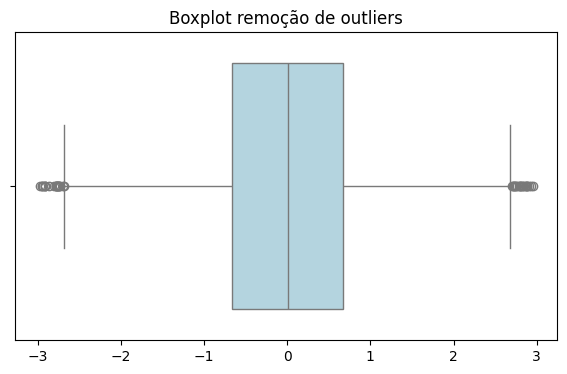

In [21]:
'''
Após a construção do boxplot e visualização dos outliers, vamos removê-los
Podemos fazer esta remoção excluindo valores superiores e inferiores de um determinado valor.
'''
normal_inferior_superior = normal[(normal >= -3) & (normal <= 3)] #Filtra os valores da variável normal com limite entre -3 e 3

#Construçao do gráfico boxplot com valores removidos
plt.figure(figsize=(7, 4))
sns.boxplot(x=normal_inferior_superior, color='lightblue')
plt.title("Boxplot remoção de outliers")
plt.show()

7. Como concatenar vários DataFrames (empilhando linhas ou colunas),
mesmo que tenham colunas diferentes?
Dica: Utiliza-se pd.concat() especificando axis=0 (linhas) ou axis=1
(colunas). Quando há colunas diferentes, os valores ausentes são
preenchidos com NaN.

In [ ]:
df_citrus = pd.read_csv("/content/citrus.csv")

df_bank = pd.read_csv("/content/bytebank.csv")

pd.concat([df_citrus, df_bank], axis="columns")


,nome,diametro,peso,vermelho,verde,azul,Meses,Valor
0,orange,2.96,86.76,172,85,2,3.0,5182.17
1,orange,3.91,88.05,166,78,3,NaN,NaN
2,orange,4.42,95.17,156,81,2,1.0,5060.00
3,orange,4.47,95.60,163,81,4,2.0,5120.72
4,orange,4.48,95.76,161,72,9,5.0,5307.29
...,...,...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20,NaN,NaN
9996,grapefruit,15.41,254.67,148,68,7,NaN,NaN
9997,grapefruit,15.59,256.50,168,82,20,NaN,NaN
9998,grapefruit,15.92,260.14,142,72,11,NaN,NaN


8. Utilizando pandas, como realizar a leitura de um arquivo CSV em um
DataFrame e exibir as primeiras linhas?


In [ ]:
'''
Um DataFrame representa uma tabela retangular de dados e contém uma coleção
ordenada e nomeada de colunas, cada uma das quais pode ser um tipo de valor
diferente (numérico, cadeia de caracteres, booleano etc.). O DataFrame tem um
índice de linha e coluna; pode ser pensado como um dicionário de séries
todas compartilhando o mesmo índice.
'''
#Importa biblioteca pandas e atribui o apelido de pd
import pandas as pd

#Le um arquivo CSV e atribui em um DataFrame df
df = pd.read_csv("/content/citrus.csv")

#Método head() seleciona e exibe as cinco primeiras linhas
df.head()


,nome,diametro,peso,vermelho,verde,azul
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


9. Utilizando pandas, como selecionar uma coluna específica e filtrar linhas
em um “DataFrame” com base em uma condição?


In [ ]:
#Carregando arquivo com valores de aluguel e atribuindo a um DataFrame
df_aluguel = pd.read_csv("/content/aluguel.csv", sep=';')

#Exibe os cinco primeiros registros do DataFrame
df_aluguel.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [ ]:
#Filtrando apartamentos que possuem um quarto
filtro1 = df_aluguel['Quartos'] == 1
df_aluguel[filtro1]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
13,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
...,...,...,...,...,...,...,...,...,...
32922,Apartamento,Barra da Tijuca,1,1,0,62,1700.0,945.0,180.0
32935,Apartamento,Leblon,1,1,1,50,4300.0,1730.0,259.0
32938,Apartamento,Copacabana,1,0,0,50,1950.0,450.0,70.0
32945,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0


In [ ]:
#Filtrando apartamentos com valor < 1200
filtro2 = df_aluguel['Valor'] < 1200
df_aluguel[filtro2]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
19,Apartamento,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0
23,Apartamento,Olaria,3,1,0,68,1000.0,670.0,NaN
...,...,...,...,...,...,...,...,...,...
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
32950,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0


In [ ]:
#Filtro final unindo os dois filtros anteriores com quartos igual a 1 e valor < 1200
filtro_final = (filtro1) & (filtro2)
df_aluguel[filtro_final]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
28,Apartamento,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Apartamento,Centro,1,0,0,27,750.0,371.0,19.0
94,Apartamento,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...,...
32763,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0
32818,Quitinete,Flamengo,1,0,0,23,900.0,605.0,NaN
32844,Quitinete,Centro,1,0,0,24,1100.0,323.0,NaN
32859,Casa,Campo Grande,1,0,0,50,600.0,NaN,NaN


10. Utilizando pandas, como lidar com valores ausentes (NaN) em um
DataFrame?


In [ ]:
'''
Existem várias estratégias para lidar com dados faltantes como preencimento
exclusão e interpolação. Podemos preencher espaços vazios com a média, modos e
numeros zeros, outra opção é remover as linhas ou colunas com dados faltantes
se os dados tem uma sequência temporal podemos utilizar métodos de interpolação
para estimar valores ausentes com base nos valores existentes.
'''
#Carregando arquivo CSV em um DataFrame
df = pd.read_csv("/content/bytebank.csv")

#Exibindo Dataframe original
df.head()

,Meses,Valor
0,3.0,5182.17
1,NaN,NaN
2,1.0,5060.00
3,2.0,5120.72
4,5.0,5307.29


In [ ]:
#Resumo de valores não nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Meses   11 non-null     float64
 1   Valor   11 non-null     float64
dtypes: float64(2)
memory usage: 324.0 bytes


In [ ]:
#Verificando valores nulos
df.isnull().sum()

,0
Meses,1
Valor,1


In [ ]:
#Preenchendo valores falantes com um valor específico
valor_especifico = df.fillna(0)
valor_especifico

,Meses,Valor
0,3.0,5182.17
1,0.0,0.00
2,1.0,5060.00
3,2.0,5120.72
4,5.0,5307.29
5,6.0,5370.97
6,7.0,5435.43
7,8.0,5500.65
8,9.0,5566.66
9,10.0,5633.46


In [ ]:
#Removendo linhas com valores nulos usando parâmetro axis especificando linhas com valor 0
df_limpo = df.dropna(axis=0)
df_limpo.head()

,Meses,Valor
0,3.0,5182.17
2,1.0,5060.00
3,2.0,5120.72
4,5.0,5307.29
5,6.0,5370.97
